In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
movies = pd.read_csv(r'C:\Users\penta\Downloads\NEELU\codsoft\movie\movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'],encoding='latin1')
ratings = pd.read_csv(r'C:\Users\penta\Downloads\NEELU\codsoft\movie\ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'],encoding='latin1')
users = pd.read_csv(r'C:\Users\penta\Downloads\NEELU\codsoft\movie\users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'])


In [10]:
combined_data = pd.merge(pd.merge(ratings, users,on='UserID'), movies)


In [11]:
genres = combined_data['Genres'].str.get_dummies('|')
combined_data = pd.concat([combined_data, genres], axis=1)


In [12]:
combined_data = pd.get_dummies(combined_data, columns=['Gender', 'Occupation'])


In [13]:
combined_data['NumGenres'] = combined_data['Genres'].apply(lambda x: len(x.split('|')))
user_avg_rating = combined_data.groupby('UserID')['Rating'].mean().reset_index()
user_avg_rating.columns = ['UserID', 'AvgRating']
combined_data = pd.merge(combined_data, user_avg_rating)


In [14]:
X = combined_data.drop(['Rating', 'MovieID', 'UserID', 'Title', 'Genres', 'Timestamp', 'ZipCode'], axis=1)
y = combined_data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 1.0147487305771532


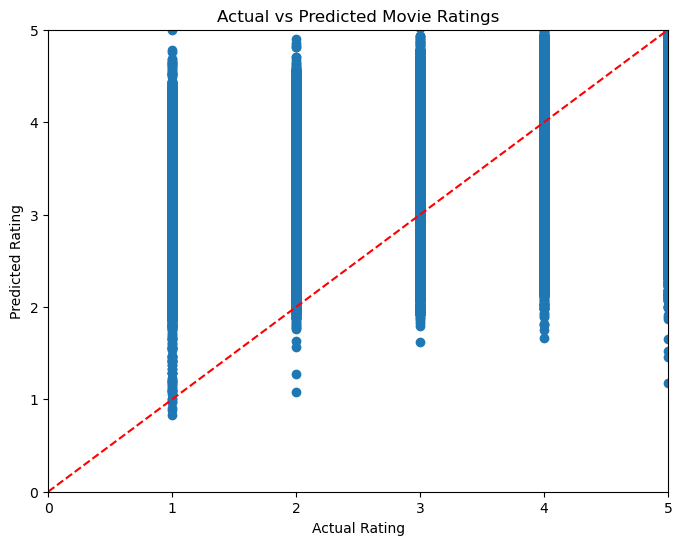

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 5], [0, 5], color='red', linestyle='--')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Movie Ratings')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()
